In [285]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.ensemble import AdaBoostClassifier
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

In [2]:
dataset = pd.read_csv(r'C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Assignments\HW2\mushroom-classification\mushrooms.csv')

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Class column is response and rest columns are predictors.
# Seprating Predictors and Response
X = dataset.drop('class',axis=1) #Predictors
y = dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Encoding the variables
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [16]:
# Enoded each feature
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [17]:
y # 1 = Poisonous; 0 = edible

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
5921,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1073,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3710,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
144,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5469,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [89]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.09412961 0.07187725]


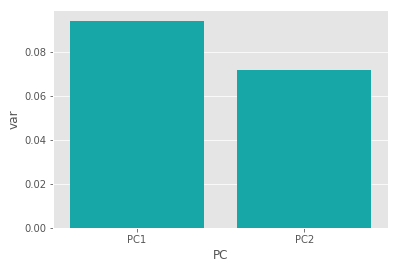

In [91]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [92]:
components = pd.DataFrame(pca.components_, columns = X.columns, index=[1, 2])
components

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
1,-0.006241,0.030496,0.016450,-0.017510,-0.003796,-0.006761,-0.081343,0.057796,-0.000335,0.013937,...,-0.067839,-0.104187,0.096254,0.069209,-0.033726,0.005039,-0.070809,0.135098,-0.043342,-0.056380
2,0.016588,-0.023484,0.139268,-0.010235,-0.067262,0.005034,0.101587,-0.006118,0.048534,0.052251,...,-0.045174,-0.095950,0.094369,-0.091826,-0.113486,0.235726,-0.051577,0.029851,-0.043473,0.070262


In [35]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [142]:
def svm_classifiers(X, y, C, changeC, degree, polydegree, rbf):
    if (changeC == True and rbf == True):
        classifier = SVC(kernel='rbf', C = C, random_state=12)
        classifier.fit(X_train, y_train)
    elif polydegree == True:
        classifier = SVC(kernel='poly', degree = degree)
        classifier.fit(X_train, y_train)
    elif changeC == True:
        classifier = SVC(kernel='linear', C=C, random_state= 11)
        classifier.fit(X_train,y_train)
    return classifier

In [292]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        #print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy', return_train_score=True)
#         print("Train score = \n", res['train_score'])
#         print("Test score",res['test_score'])
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        #print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [343]:
linear_classifier = svm_classifiers(X_train,y_train, 0.001, True, None, False, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=False)

print("\n***********************************************************\n")

linear_classifier = svm_classifiers(X_train,y_train, 0.1, True, None, False, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=False)
linear_model_acc = test_acc21
linear_res = res20

print("\n***********************************************************\n")

linear_classifier = svm_classifiers(X_train,y_train, 1, True, None, False, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(linear_classifier,X_train,y_train,X_test,y_test,train=False)


Training results:

Accuracy Score: 0.8954

Confusion Matrix:
[[2873   78]
 [ 517 2218]]

Average Accuracy for Train data:	0.8947

Average Accuracy for Validation data :	0.8948


Test results:

Accuracy Score: 0.8934

Confusion Matrix:
[[1229   28]
 [ 232  949]]


***********************************************************

Training results:

Accuracy Score: 0.8991

Confusion Matrix:
[[2860   91]
 [ 483 2252]]

Average Accuracy for Train data:	0.8991

Average Accuracy for Validation data :	0.8987


Test results:

Accuracy Score: 0.8999

Confusion Matrix:
[[1224   33]
 [ 211  970]]


***********************************************************

Training results:

Accuracy Score: 0.8991

Confusion Matrix:
[[2860   91]
 [ 483 2252]]

Average Accuracy for Train data:	0.8992

Average Accuracy for Validation data :	0.8992


Test results:

Accuracy Score: 0.8999

Confusion Matrix:
[[1224   33]
 [ 211  970]]



In [348]:
linear_test_score = 1- linear_res['test_score']
linear_train_score = 1-linear_res['train_score']

total_error_test_acc = []
total_error_test_acc.append(1-test_acc11)
total_error_test_acc.append(1-test_acc21)
total_error_test_acc.append(1-test_acc31)
total_error_test_acc

[0.10664479081214107, 0.10008203445447084, 0.10008203445447084]

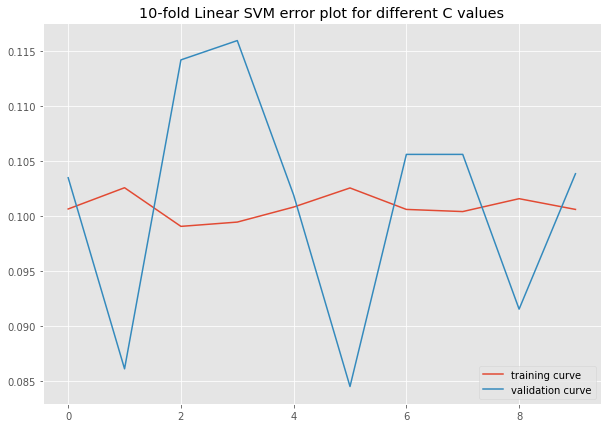

In [355]:
# Doubtful Error plot
plt.figure(figsize=(10,7))
plt.title('10-fold Linear SVM error plot for different C values')
plt.plot(linear_train_score, label = 'training curve')
plt.plot(linear_test_score, label = 'validation curve')
#plt.plot(x,total_error_test_acc, label='test curve')
plt.legend(loc='lower right')

<Figure size 432x288 with 0 Axes>

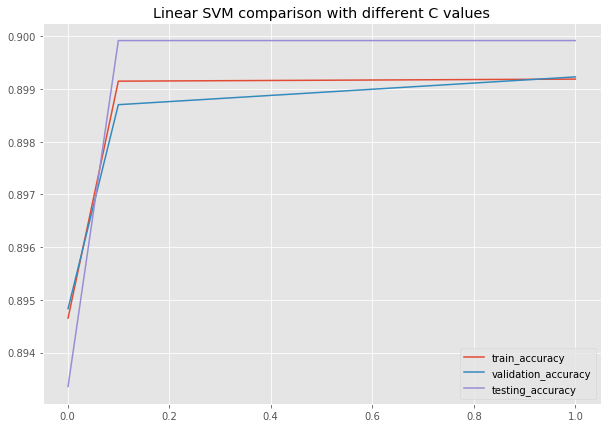

In [345]:
## Plotting the curves of training and test across C values
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)
#total_train_acc.append(mean_train_acc40)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)
#total_valid_acc.append(mean_valid_acc40)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)
#total_test_acc.append(test_acc41)

c=[0.001,0.1,1]
plt.figure(figsize=(10,7))
plt.title('Linear SVM comparison with different C values')
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset2_TVT_linear.png')

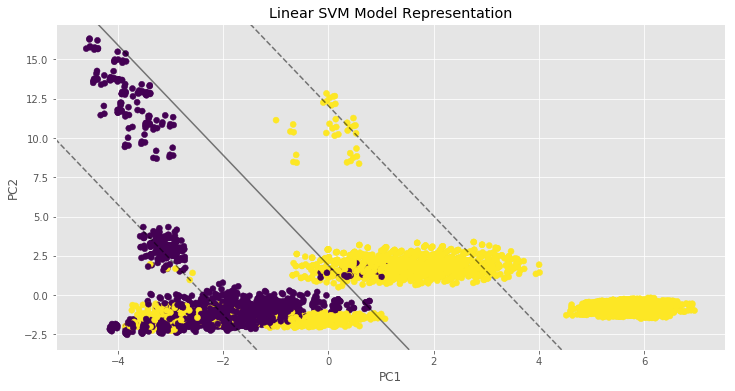

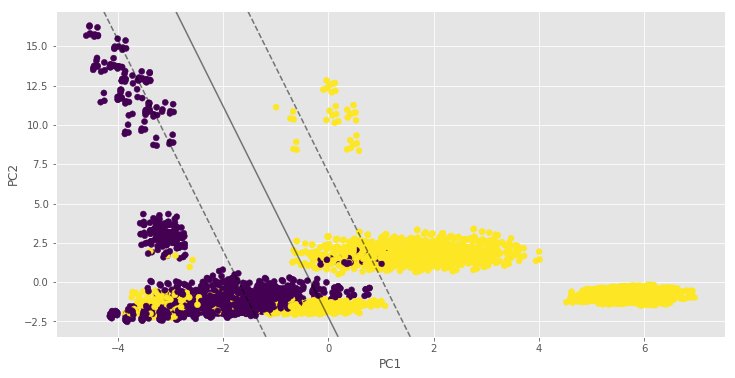

In [391]:
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X_sub = pd.DataFrame(X_train, columns=['PC1','PC2'])
X_sub = X_sub.values
y_sub = y_train.copy()
plt.title('Linear SVM Model Representation')
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf1 = SVC(kernel='linear', C=C)
    clf1.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf1.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf1.support_vectors_[:, 0], 
                clf1.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.savefig('LinearSVM_Model.png')
    plt.show()
    # Returns the classifier
    return clf1

clf_arr = []
clf_arr.append(draw_svm(X_sub, y_sub, 0.0001))
clf_arr.append(draw_svm(X_sub, y_sub, 1))

In [387]:
# Polynomial with degree

poly_classifier = svm_classifiers(X_train,y_train, 0.001, False, 2, True, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=False)
print("\n ****************************************************** \n")
poly_classifier = svm_classifiers(X_train,y_train, 0.001, False, 3, True, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=False)
poly_model_acc = test_acc21
poly_res = res20
print("\n ****************************************************** \n")
poly_classifier = svm_classifiers(X_train,y_train, 0.001, False, 4, True, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(poly_classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.6708

Confusion Matrix:
[[2741  210]
 [1662 1073]]

Average Accuracy for Train data:	0.6707

Average Accuracy for Validation data :	0.6708


Test results:

Accuracy Score: 0.6723

Confusion Matrix:
[[1173   84]
 [ 715  466]]


 ****************************************************** 

Training results:

Accuracy Score: 0.8783

Confusion Matrix:
[[2913   38]
 [ 654 2081]]

Average Accuracy for Train data:	0.8783

Average Accuracy for Validation data :	0.8788


Test results:

Accuracy Score: 0.8679

Confusion Matrix:
[[1244   13]
 [ 309  872]]


 ****************************************************** 

Training results:

Accuracy Score: 0.7687

Confusion Matrix:
[[2778  173]
 [1142 1593]]

Average Accuracy for Train data:	0.7693

Average Accuracy for Validation data :	0.7684


Test results:

Accuracy Score: 0.7572

Confusion Matrix:
[[1181   76]
 [ 516  665]]



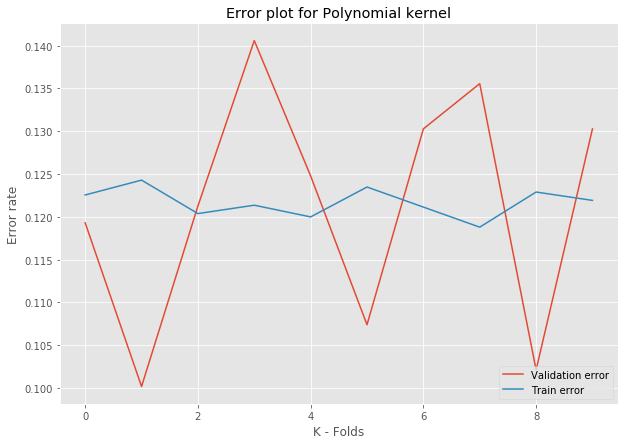

In [390]:
poly_test_score = 1- poly_res['test_score']
poly_train_score = 1-poly_res['train_score']

plt.figure(figsize=(10,7))
plt.title('Error plot for Polynomial kernel')
plt.plot(poly_test_score, label='Validation error')
plt.plot(poly_train_score, label = 'Train error')
plt.xlabel('K - Folds')
plt.ylabel('Error rate')
plt.legend(loc='lower right')
plt.savefig('Dataset2_ErrorPlotPoly')

<Figure size 720x504 with 0 Axes>

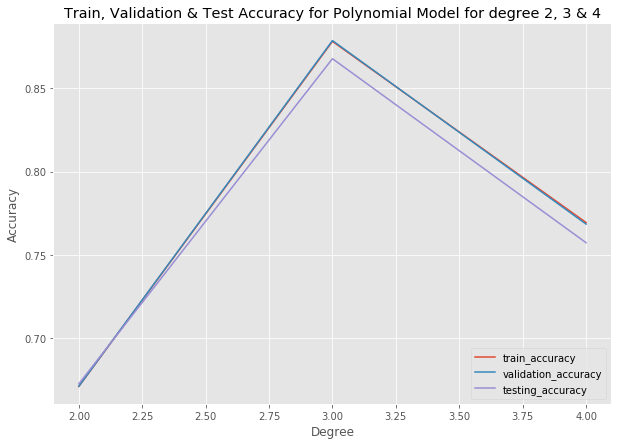

In [389]:
## Plotting the curves of training and test across degree 
plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)
#total_train_acc.append(mean_train_acc40)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)
#total_valid_acc.append(mean_valid_acc40)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)
#total_test_acc.append(test_acc41)

c=[2,3,4]
plt.figure(figsize=(10,7))
plt.title("Train, Validation & Test Accuracy for Polynomial Model for degree 2, 3 & 4")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset2_TV_accuracy_Polynomail.png')

In [384]:
rbf_classifier = svm_classifiers(X_train,y_train, 0.0001, True, None, False, True)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=False)
print("\n ****************************************************** \n")
rbf_classifier = svm_classifiers(X_train,y_train, 0.1, True, None, False, True)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=False)
print("\n ****************************************************** \n")

# best SVM model
rbf_classifier = svm_classifiers(X_train,y_train, 1, True, None, False, True)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(rbf_classifier,X_train,y_train,X_test,y_test,train=False)

rbf_model_acc = test_acc31
rbf_res = res30

Training results:

Accuracy Score: 0.5190

Confusion Matrix:
[[2951    0]
 [2735    0]]

Average Accuracy for Train data:	0.5190

Average Accuracy for Validation data :	0.5190


Test results:

Accuracy Score: 0.5156

Confusion Matrix:
[[1257    0]
 [1181    0]]


 ****************************************************** 

Training results:

Accuracy Score: 0.9203

Confusion Matrix:
[[2895   56]
 [ 397 2338]]

Average Accuracy for Train data:	0.9202

Average Accuracy for Validation data :	0.9202


Test results:

Accuracy Score: 0.9147

Confusion Matrix:
[[1235   22]
 [ 186  995]]


 ****************************************************** 

Training results:

Accuracy Score: 0.9289

Confusion Matrix:
[[2884   67]
 [ 337 2398]]

Average Accuracy for Train data:	0.9287

Average Accuracy for Validation data :	0.9281


Test results:

Accuracy Score: 0.9258

Confusion Matrix:
[[1232   25]
 [ 156 1025]]



In [385]:
rbf_test_score = 1- rbf_res['test_score']
rbf_train_score = 1-rbf_res['train_score']

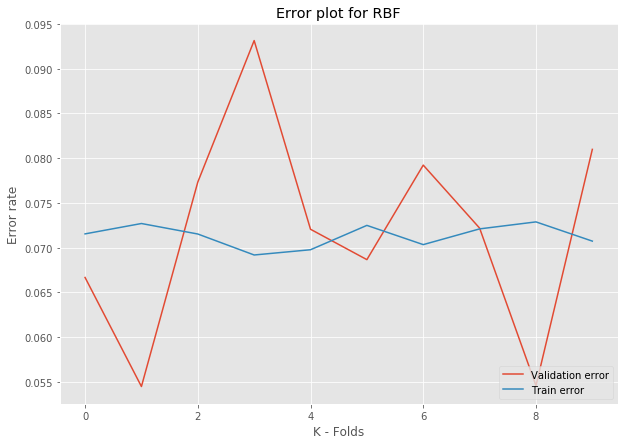

In [382]:
plt.figure(figsize=(10,7))
plt.title('Error plot for RBF')
plt.plot(rbf_test_score, label='Validation error')
plt.plot(rbf_train_score, label = 'Train error')
plt.xlabel('K - Folds')
plt.ylabel('Error rate')
plt.legend(loc='lower right')
plt.savefig('Dataset2_ErrorPlotRBF')

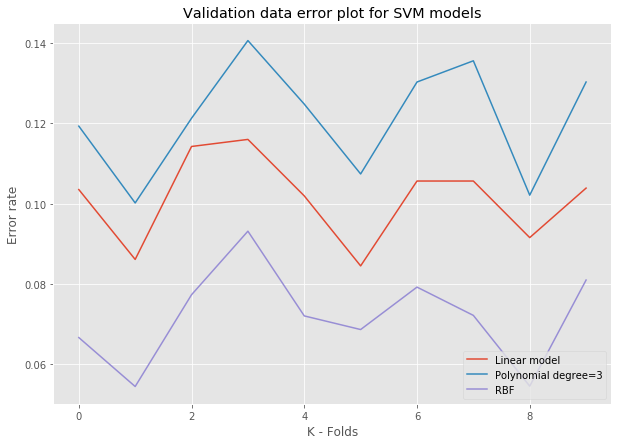

In [381]:
# plotting all three models
plt.figure(figsize=(10,7))
plt.title('Validation data error plot for SVM models')
plt.plot(linear_test_score, label='Linear model')
plt.plot(poly_test_score,label='Polynomial degree=3')
plt.plot(rbf_test_score, label='RBF')
plt.xlabel('K - Folds')
plt.ylabel('Error rate')
plt.legend(loc='lower right')
plt.savefig('Dataset2_ValidErrorComparison_3Model.png')

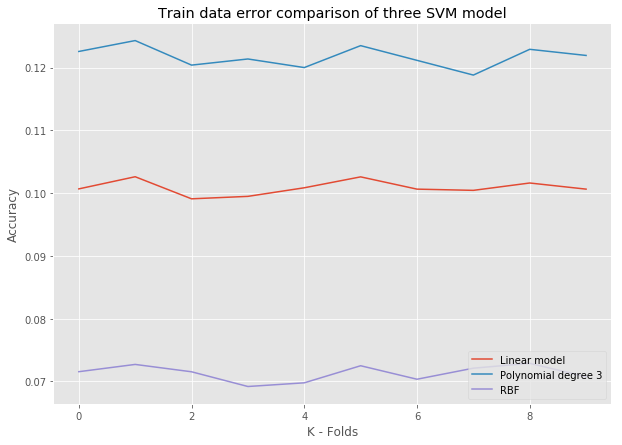

In [379]:
# plotting all three models
plt.figure(figsize=(10,7))
plt.title('Train data error comparison of three SVM model')
plt.plot(linear_train_score, label='Linear model')
plt.plot(poly_train_score,label='Polynomial degree 3')
plt.plot(rbf_train_score, label='RBF')
plt.xlabel('K - Folds')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset2_TrainErrorComparison')

<Figure size 432x288 with 0 Axes>

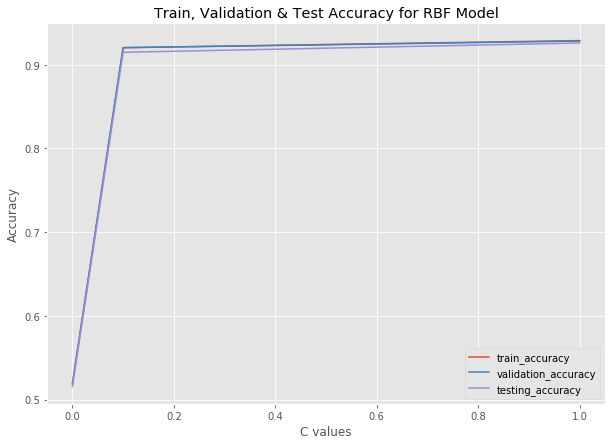

In [386]:
## Plotting the curves of training and test across degree 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)
#total_train_acc.append(mean_train_acc40)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)
#total_valid_acc.append(mean_valid_acc40)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)
#total_test_acc.append(test_acc41)

c=[0.0001,0.1,1]
plt.figure(figsize=(10,7))
plt.title("Train, Validation & Test Accuracy for RBF Model")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset2_TVT_accuracy_RBF.png')

In [370]:
def diff_dep(X_train, y_train, depth):
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    classifier.fit(X_train,y_train)
    return classifier

In [371]:
# Decision Tree classifier
if_classifier = diff_dep(X_train, y_train, 2)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=False)

print("\n ***************************************** \n")
if_classifier = diff_dep(X_train, y_train, 5)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(X_train, y_train, 10)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(if_classifier,X_train,y_train,X_test,y_test,train=False)

tree_model_acc = test_acc31
tree_res = res30

Training results:

Accuracy Score: 0.9070

Confusion Matrix:
[[2847  104]
 [ 425 2310]]

Average Accuracy for Train data:	0.9072

Average Accuracy for Validation data :	0.9061


Test results:

Accuracy Score: 0.9003

Confusion Matrix:
[[1212   45]
 [ 198  983]]


 ***************************************** 

Training results:

Accuracy Score: 0.9270

Confusion Matrix:
[[2780  171]
 [ 244 2491]]

Average Accuracy for Train data:	0.9286

Average Accuracy for Validation data :	0.9219


Test results:

Accuracy Score: 0.9221

Confusion Matrix:
[[1186   71]
 [ 119 1062]]


 ***************************************** 

Training results:

Accuracy Score: 0.9508

Confusion Matrix:
[[2879   72]
 [ 208 2527]]

Average Accuracy for Train data:	0.9521

Average Accuracy for Validation data :	0.9210


Test results:

Accuracy Score: 0.9225

Confusion Matrix:
[[1194   63]
 [ 126 1055]]



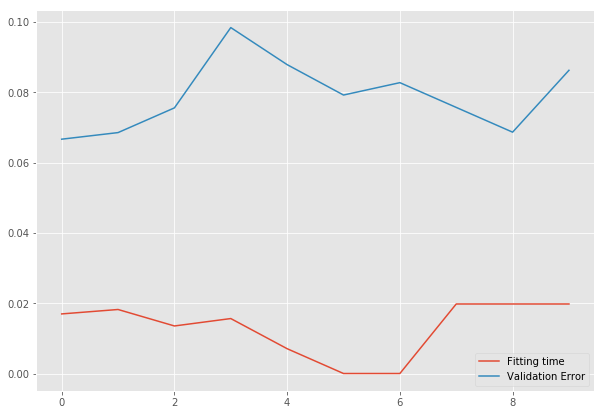

In [342]:
res30
plt.figure(figsize=(10,7))
plt.plot(res30['fit_time'], label = 'Fitting time')
plt.plot(1-res30['test_score'], label = 'Validation Error')
plt.legend(loc='lower right')

<Figure size 432x288 with 0 Axes>

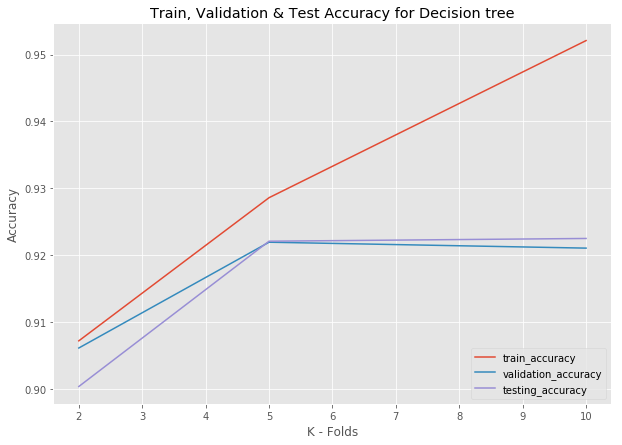

In [374]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)
#total_train_acc.append(mean_train_acc40)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)
#total_valid_acc.append(mean_valid_acc40)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)
#total_test_acc.append(test_acc41)

c=[2,5,10]
plt.figure(figsize=(10,7))
plt.title("Train, Validation & Test Accuracy for Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('K - Folds')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset2_TVT_accuracy_Decision_tree.png')

In [156]:
# # Decision Tree classifier
# gini_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
# gini_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [157]:
# print_score(gini_classifier,X_train,y_train,X_test,y_test,train=False)



Test results:

Accuracy Score: 0.9266

Confusion Matrix:
[[1224   33]
 [ 146 1035]]



In [283]:
# Ensemble methods
def depth_boost(X_train, y_train, depth):
    classifier = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=depth))
    classifier.fit(X_train,y_train)
    return classifier

In [375]:
## Adap BOOST 
boost_classifier = depth_boost(X_train, y_train, 3)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 5)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 10)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(boost_classifier,X_train,y_train,X_test,y_test,train=False)
boost_model_acc = test_acc31
boost_res = res30

Training results:

Accuracy Score: 0.9578

Confusion Matrix:
[[2903   48]
 [ 192 2543]]

Average Accuracy for Train data:	0.9606

Average Accuracy for Validation data :	0.9147


Test results:

Accuracy Score: 0.9204

Confusion Matrix:
[[1198   59]
 [ 135 1046]]


 ****************************************************** 

Training results:

Accuracy Score: 0.9995

Confusion Matrix:
[[2950    1]
 [   2 2733]]

Average Accuracy for Train data:	1.0000

Average Accuracy for Validation data :	0.9068


Test results:

Accuracy Score: 0.9106

Confusion Matrix:
[[1164   93]
 [ 125 1056]]


 ****************************************************** 

Training results:

Accuracy Score: 1.0000

Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy for Train data:	1.0000

Average Accuracy for Validation data :	0.9170


Test results:

Accuracy Score: 0.9221

Confusion Matrix:
[[1194   63]
 [ 127 1054]]



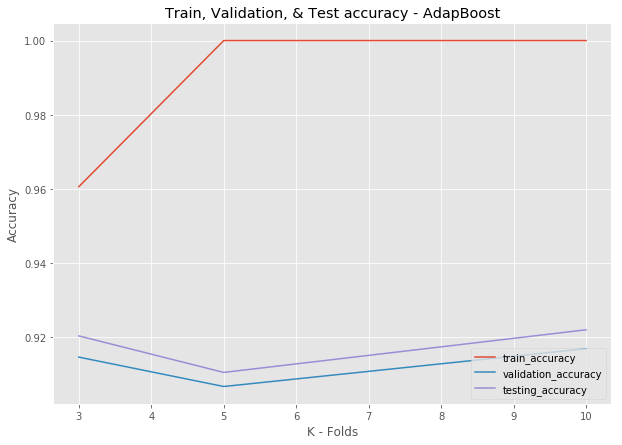

In [376]:
## Plotting the curves of training and test across different depths 
plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)
#total_train_acc.append(mean_train_acc40)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)
#total_valid_acc.append(mean_valid_acc40)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)
#total_test_acc.append(test_acc41)

c=[3,5,10]
plt.title("Train, Validation, & Test accuracy - AdapBoost")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('K - Folds')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('dataset2_TVT_accuracy_AdapBoost.png')

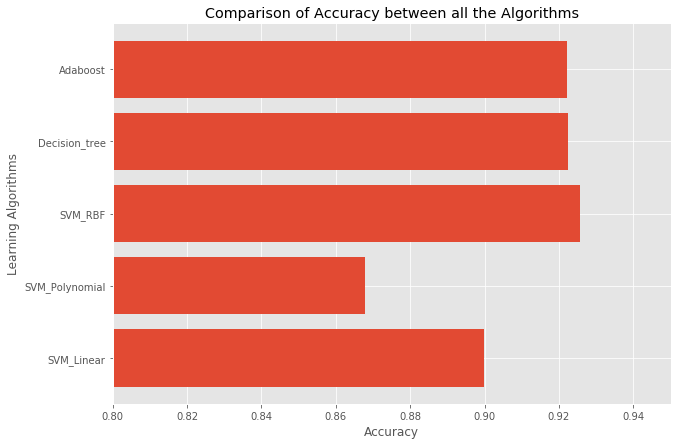

In [378]:
accuracy=[linear_model_acc,poly_model_acc,rbf_model_acc,tree_model_acc,boost_model_acc]
Functions=['SVM_Linear','SVM_Polynomial','SVM_RBF','Decision_tree','Adaboost']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
plt.xlim([0.8,0.95])
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.savefig('dataset2_Comparison_of_Accuracy_between_all_the_Algorithms.png')

In [393]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

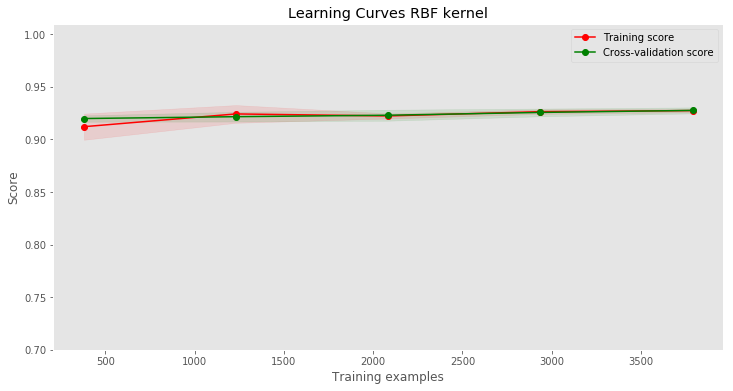

<Figure size 864x432 with 0 Axes>

In [400]:
title = r"Learning Curves RBF kernel"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(test_size=0.2, random_state=0)
classifier = SVC(kernel='rbf', C = 1, random_state=12)
plot_learning_curve(classifier, title, X_train, y_train, (0.7, 1.01))
plt.show()
plt.savefig('Dataset_2_performaceRBF')